### Importing Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [99]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
import pickle
import re

### Importing Dataset

In [34]:
data = pd.read_csv(r"amazon_alexa.tsv", delimiter = '\t', quoting = 3)

print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [35]:
    data.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  "Sometimes while playing a game, you can answe...         1  
3  "I have had a lot of fun with this thing. My 4...         1  
4                                              Music         1

### Exploratory Data Analysis

In [36]:
print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [37]:
data.isnull().sum()


rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [38]:
data[data['verified_reviews'].isna() == True]

rating       date variation verified_reviews  feedback
473       2  29-Jun-18     White              NaN         0

In [39]:
#We will drop the null record

data.dropna(inplace=True)


In [40]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3149, 5)


In [41]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['verified_reviews'].apply(len)

In [42]:
data.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  length  
0                                      Love my Echo!         1      13  
1                                          Loved it!         1       9  
2  "Sometimes while playing a game, you can answe...         1     197  
3  "I have had a lot of fun with this thing. My 4...         1     174  
4                                              Music         1       5

In [43]:
#Randomly checking for 10th record

print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}") #Original value
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[10]['length']}") #Value of the column 'length'

'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length' column value : 65


In [44]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

##### ANALYZING 'RATING' COLUMN

In [45]:
len(data)

3149

In [46]:
#Distinct values of 'rating' and its count  

print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_23092\2049428869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['rating'].value_counts().index, y=data['rating'].value_counts().values, palette='viridis')


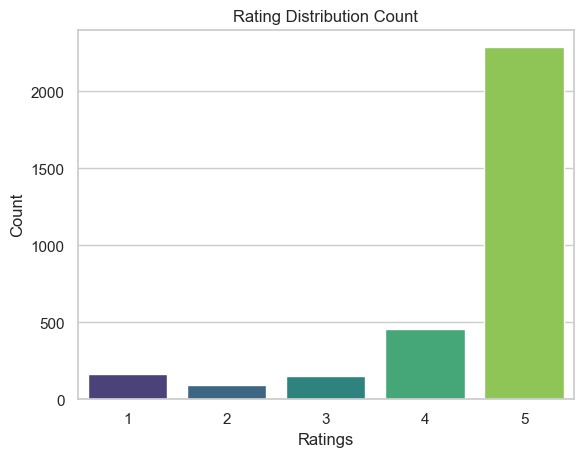

In [47]:
sns.set_theme(style="whitegrid")
sns.barplot(x=data['rating'].value_counts().index, y=data['rating'].value_counts().values, palette='viridis')
plt.title('Rating Distribution Count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()


In [48]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


In [49]:
import pandas as pd
import plotly.express as px

tags = data['rating'].value_counts() / data.shape[0]


df_tags = pd.DataFrame({'Rating': tags.index, 'Percentage': tags.values})
fig = px.pie(df_tags, values='Percentage', names='Rating', title='Percentage Wise Distribution of Rating', color_discrete_sequence=px.colors.sequential.Viridis)

fig.update_layout(width=500, height=500)

fig.show()


##### ANALYZING 'FEEDBACK' COLUMN

In [50]:
#Distinct values of 'feedback' and its count 

print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


In [51]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [52]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


C:\Users\hp\AppData\Local\Temp\ipykernel_23092\1546780991.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




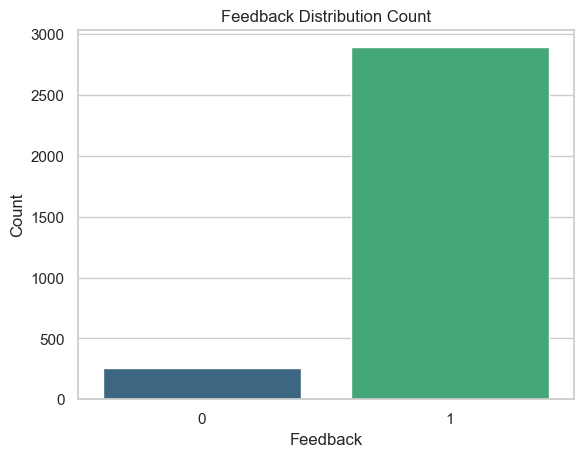

In [53]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.barplot(x=data['feedback'].value_counts().index, y=data['feedback'].value_counts().values, palette='viridis')
plt.title('Feedback Distribution Count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()


In [54]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


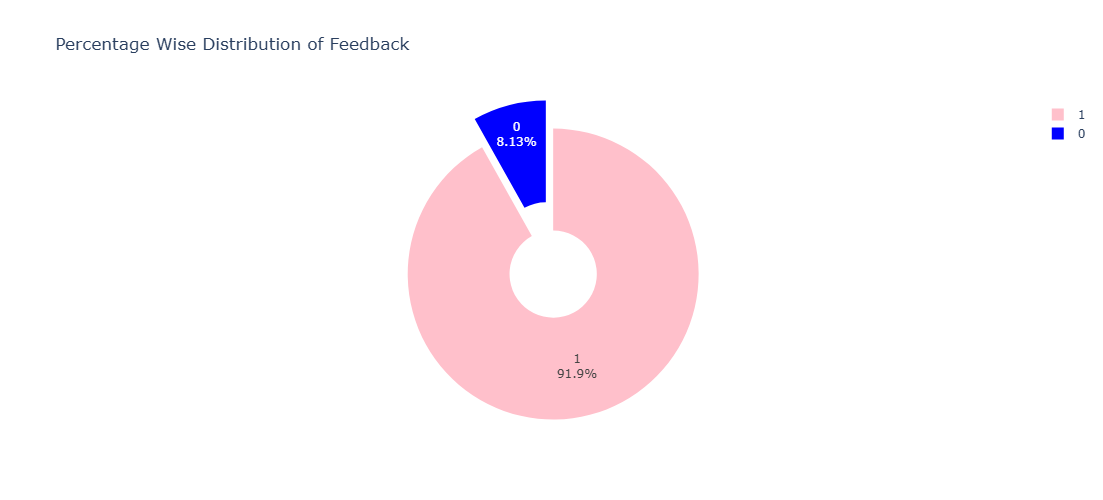

In [55]:
import plotly.express as px

tags = data['feedback'].value_counts() / data.shape[0]

fig = px.pie(
    names=tags.index,
    values=tags.values,
    title='Percentage Wise Distribution of Feedback',
    color_discrete_sequence=['pink', 'blue'],
    hole=0.3
)

fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1])
fig.update_layout(
    width=500,
    height=500,
    showlegend=True
)

fig.show()


###### Let's see the 'rating' values for different values of 'feedback'

In [56]:
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [57]:
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

##### ANALYZING 'VARIATION' COLUMN

In [58]:
#Distinct values of 'variation' and its count 

print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


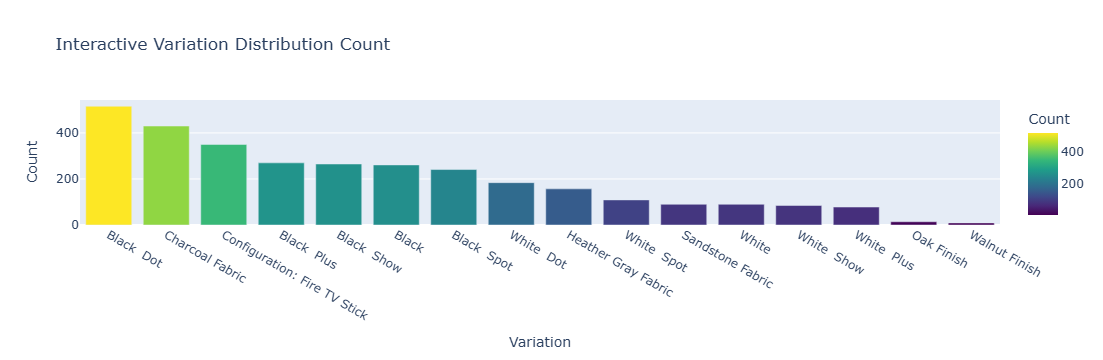

In [59]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({'Variation': data['variation'].value_counts().index, 'Count': data['variation'].value_counts().values})

fig = px.bar(df, x='Variation', y='Count', title='Interactive Variation Distribution Count', color='Count', color_continuous_scale='Viridis')
fig.show()



In [60]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [61]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

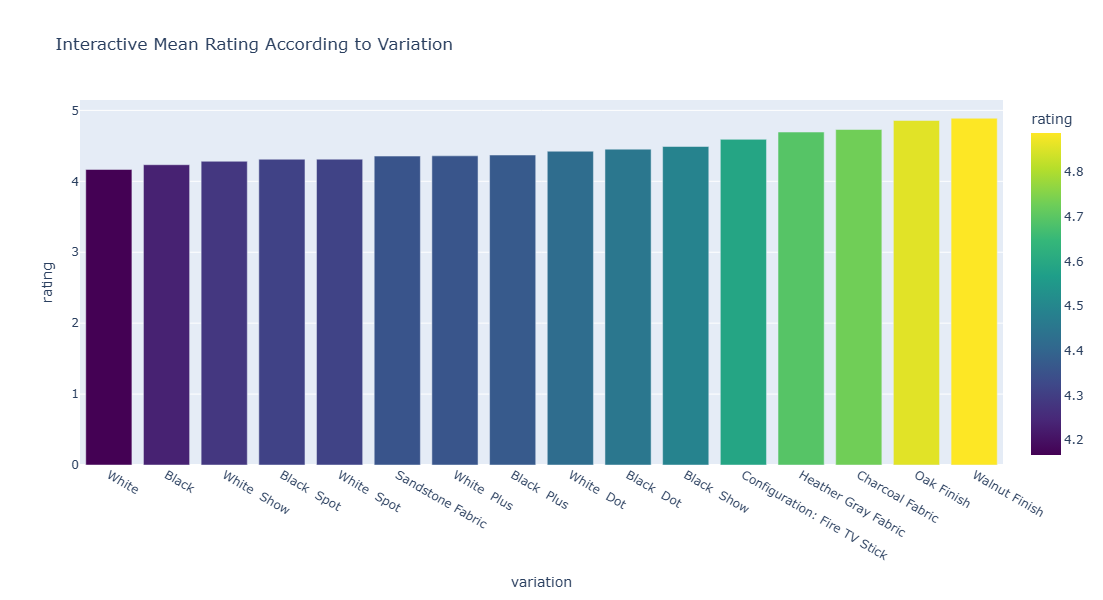

In [62]:
import plotly.express as px
import pandas as pd

mean_ratings = data.groupby('variation')['rating'].mean().sort_values().reset_index()
fig = px.bar(mean_ratings, x='variation', y='rating', title='Interactive Mean Rating According to Variation', color='rating', color_continuous_scale='Viridis')
fig.update_layout(width=1000, height=600)
fig.show()


##### ANALYZING 'VERIFIED_REVIEWS' COLUMN

In [63]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

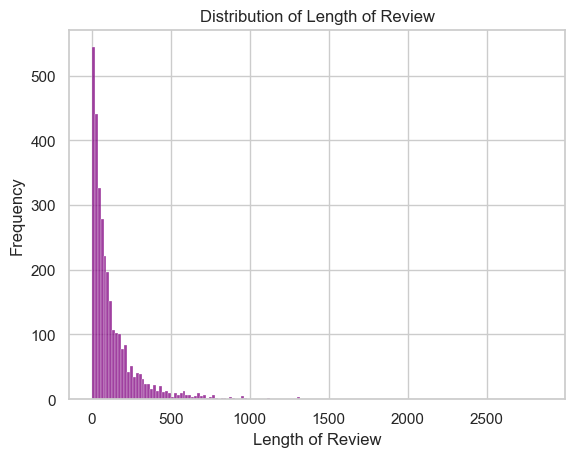

In [64]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.histplot(data['length'], color='purple').set(title='Distribution of Length of Review', xlabel='Length of Review', ylabel='Frequency')
plt.show()


[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

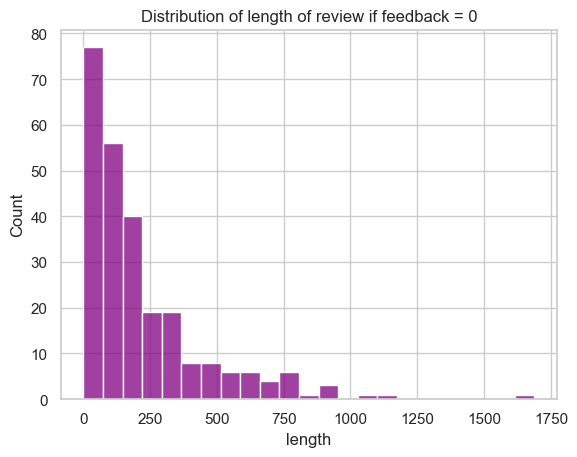

In [65]:
sns.histplot(data[data['feedback']==0]['length'],color='purple').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

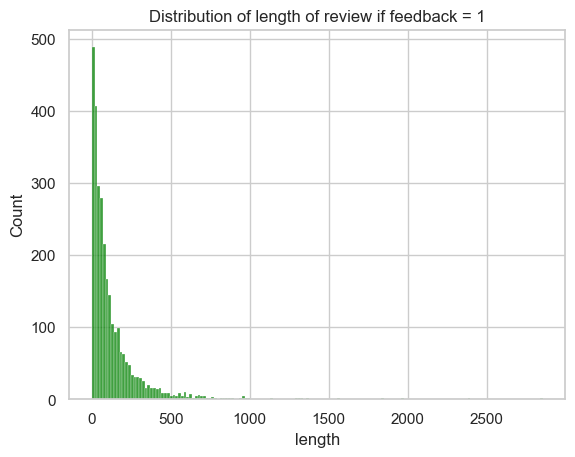

In [66]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

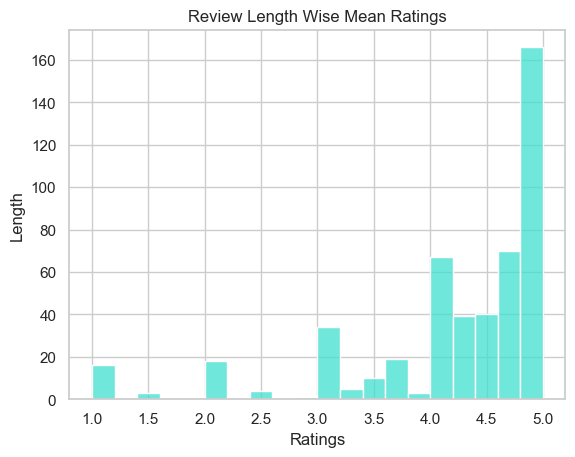

In [67]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.histplot(data.groupby('length')['rating'].mean(), color='turquoise', bins=20)
plt.title("Review Length Wise Mean Ratings")
plt.xlabel('Ratings')
plt.ylabel('Length')
plt.grid(True)
plt.show()


In [68]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

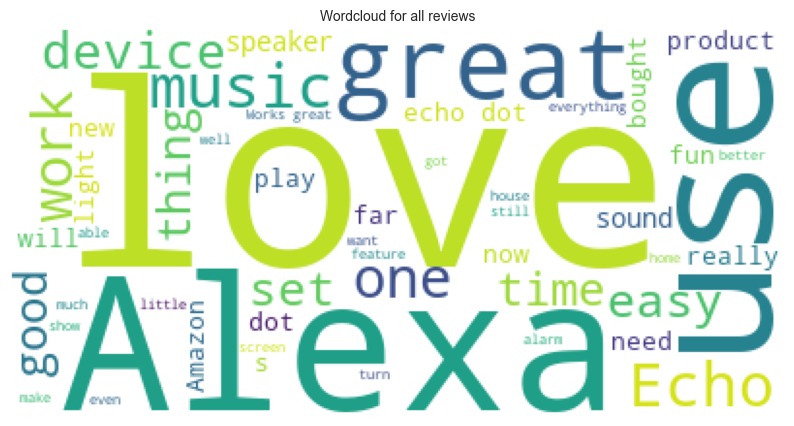

In [69]:

from wordcloud import WordCloud, STOPWORDS

# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])
                    
# Initialize wordcloud object with stopwords
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='white', max_words=50, stopwords=stopwords)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')

# Save the wordcloud as an image file
wc.to_file('wordcloud.png')
plt.show()


In [70]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

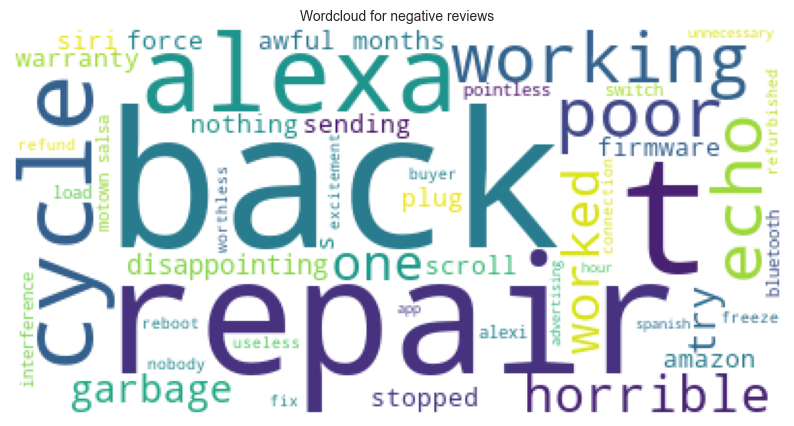

In [71]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

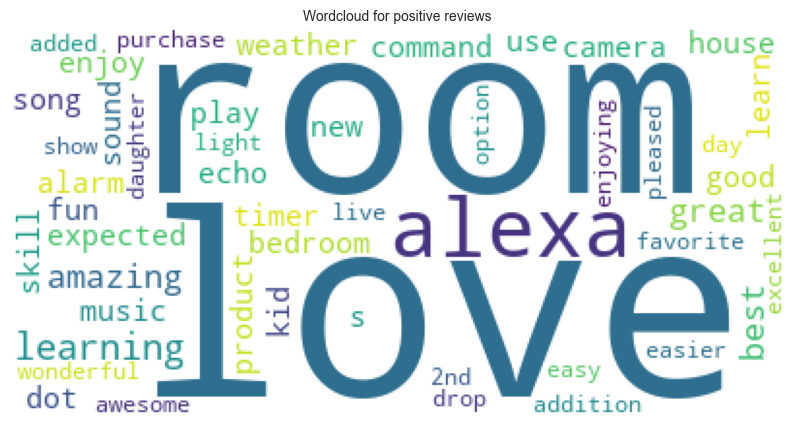

In [72]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

### Data Preprocessing

In [73]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
corpus = []
stemmer = PorterStemmer()

for i in range(0, data.shape[0]):
    review = data.iloc[i]['verified_reviews']
    
    # Skip NaN reviews
    if pd.isna(review):
        continue
    
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if word not in STOPWORDS]
    review = ' '.join(review)
    
    corpus.append(review)


In [75]:
corpus

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker t wait see',
 'without cellphon use mani featur ipad see use great alarm u almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one ve purchas m work get one everi room hous realli featur offer specifili play music echo control light throughout hous',
 'look great',
 'love ve listen song haven t heard childhood news weather inform s great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far s easi use understand make laugh time',
 'purchas mother knee problem now give someth tri come get around fast enjoy littl big thing alexa play song tim

### Data Trasformation

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [77]:
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

In [78]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


##### SPLITTING DATA INTO TRAIN AND TEST SET WITH 30% DATA WITH TESTING

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [83]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


### Model Fitting -- (RANDOM FOREST)

In [84]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [85]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9941016333938294
Testing Accuracy : 0.9417989417989417


In [86]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [87]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

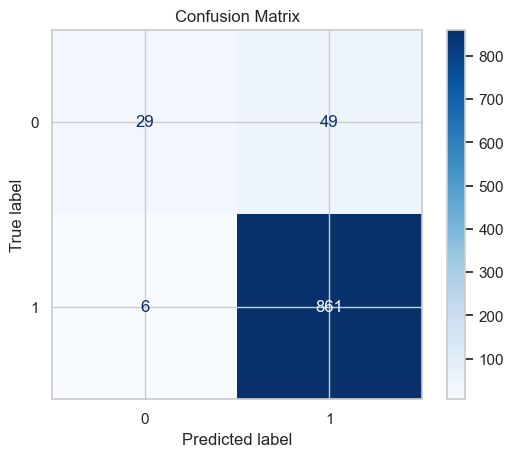

In [88]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()



In [89]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9324002468120115
Standard Variance : 0.006181465628146161


In [90]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [91]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast



GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [92]:
#Getting the best parameters from the grid search


print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 300}


In [93]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 96.73888384754991
Cross validation mean accuracy on test set : 92.17332123411978
Accuracy score for test set : 0.9417989417989417


### DECISION TREE CLASSIFIER

In [94]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)


DecisionTreeClassifier()

In [95]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9941016333938294
Testing Accuracy : 0.9216931216931217


In [96]:
y_preds = model_dt.predict(X_test)

In [97]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 41  37]
 [ 74 793]]


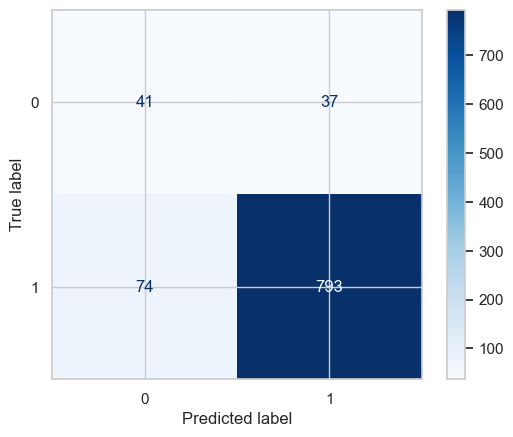

In [98]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot(cmap='Blues')
plt.show()